In [1]:
# import Agros Suite
from agrossuite import agros
from agrossuite.vtk_tools import view_geometry, view_scalar

In [2]:
# problem
problem = agros.problem(clear = True)
problem.coordinate_type = "axisymmetric"
problem.mesh_type = "triangle"

problem.time_step_method = "fixed"
problem.time_method_order = 2
problem.time_total = 15000
problem.time_steps = 20

# fields
# heat
heat = problem.field("heat")
heat.analysis_type = "transient"
heat.matrix_solver = "external_plugin"
heat.transient_initial_condition = 293.15
heat.number_of_refinements = 0
heat.polynomial_order = 2
heat.adaptivity_type = "disabled"
heat.solver = "linear"

# boundaries
heat.add_boundary("Neumann", "heat_heat_flux", {"heat_convection_external_temperature" : 0, "heat_convection_heat_transfer_coefficient" : 0, "heat_heat_flux" : 0, "heat_radiation_ambient_temperature" : 0, "heat_radiation_emissivity" : 0})
heat.add_boundary("Convection", "heat_heat_flux", {"heat_convection_external_temperature" : 293, "heat_convection_heat_transfer_coefficient" : 10, "heat_heat_flux" : 0, "heat_radiation_ambient_temperature" : 0, "heat_radiation_emissivity" : 0})

# materials
heat.add_material("Air", {"heat_conductivity" : 0.02, "heat_density" : 1.2, "heat_specific_heat" : 1000, "heat_velocity_angular" : 0, "heat_velocity_x" : 0, "heat_velocity_y" : 0, "heat_volume_heat" : 0})
heat.add_material("Copper", {"heat_conductivity" : 200, "heat_density" : 8700, "heat_specific_heat" : 385, "heat_velocity_angular" : 0, "heat_velocity_x" : 0, "heat_velocity_y" : 0, "heat_volume_heat" : { "expression" : "2e5*(time<5000)" }})
heat.add_material("Iron", {"heat_conductivity" : 60, "heat_density" : 7800, "heat_specific_heat" : 460, "heat_velocity_angular" : 0, "heat_velocity_x" : 0, "heat_velocity_y" : 0, "heat_volume_heat" : 0})
heat.add_material("Brass", {"heat_conductivity" : 100, "heat_density" : 8400, "heat_specific_heat" : 378, "heat_velocity_angular" : 0, "heat_velocity_x" : 0, "heat_velocity_y" : 0, "heat_volume_heat" : 0})

# geometry
geometry = problem.geometry()
geometry.add_edge(0, 0.18, 0.035, 0.18, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.035, 0.18, 0.035, 0.03, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.035, 0.03, 0.0135, 0.03, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.0135, 0.03, 0.0135, 0.038)
geometry.add_edge(0.0135, 0.038, 0.019, 0.038)
geometry.add_edge(0.027, 0.038, 0.027, 0.172)
geometry.add_edge(0.027, 0.172, 0.008, 0.172)
geometry.add_edge(0.008, 0.172, 0.008, 0.16)
geometry.add_edge(0.008, 0.16, 0, 0.16)
geometry.add_edge(0, 0.16, 0, 0.18, boundaries = {"heat" : "Neumann"})
geometry.add_edge(0, 0.13, 0.008, 0.13)
geometry.add_edge(0.008, 0.13, 0.008, 0.0395)
geometry.add_edge(0.008, 0, 0, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0, 0, 0, 0.13, boundaries = {"heat" : "Neumann"})
geometry.add_edge(0.019, 0.038, 0.027, 0.038)
geometry.add_edge(0.019, 0.038, 0.019, 0.0395)
geometry.add_edge(0, 0.13, 0, 0.16, boundaries = {"heat" : "Neumann"})
geometry.add_edge(0.01, 0.041, 0.01, 0.1705)
geometry.add_edge(0.025, 0.041, 0.01, 0.041)
geometry.add_edge(0.01, 0.1705, 0.025, 0.1705)
geometry.add_edge(0.025, 0.1705, 0.025, 0.041)
geometry.add_edge(0.008, 0.0395, 0.008, 0.03)
geometry.add_edge(0.008, 0.03, 0.008, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.019, 0.0395, 0.009, 0.0395)
geometry.add_edge(0.008, 0.03, 0.009, 0.03, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.009, 0.0395, 0.009, 0.03)
geometry.add_edge(0.009, 0.03, 0.0135, 0.03, boundaries = {"heat" : "Convection"})

geometry.add_label(0.0308709, 0.171031, materials = {"heat" : "Iron"})
geometry.add_label(0.00316251, 0.011224, materials = {"heat" : "Iron"})
geometry.add_label(0.0163723, 0.144289, materials = {"heat" : "Copper"})
geometry.add_label(0.00380689, 0.151055, materials = {"heat" : "Air"})
geometry.add_label(0.0112064, 0.0336487, materials = {"heat" : "Brass"})

4

In [3]:
# computation
computation = problem.computation()
computation.solve()

Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 1/20, time 750 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 2/20, time 1500 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 3/20, time 2250 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 4/20, time 3000 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 5/20, time 3750 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 6/20, time 4500 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 7/20, time 5250 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 8/20, time 6000 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 9/20, time 6750 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 10/20, time 7500 s
Solver: Solver - MUMPS (none)
Solver (heat): Constant step 11/20, time 8250 s
Solver: Solver - MUMPS (none)
Solver (

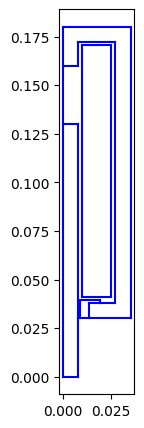

In [4]:
view_geometry(problem)

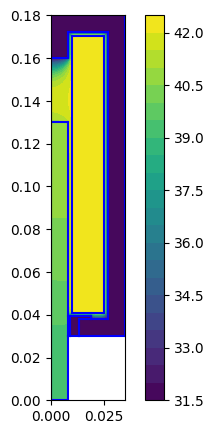

In [5]:
view_scalar(problem, computation, time_step=20, adaptive_step=0, field="heat", variable="heat_temperature_degrees", component="scalar")